In [1]:
from seq_net import *
net = SeqNet()

In [2]:
import os
import pickle

data = {}
for f in os.listdir('data'):
    data[f[:-2]] = pickle.load(open('data/' + f, 'rb'), encoding='latin1')
    
labels = [x for x in data]
testing = ['NF2']
training = [x for x in labels if x != 'NF2']

val = []
tran = []

In [3]:
for x in data:
    print(x, len(data[x]))

CUL3 153
NF1 735
NF2 222
CCDC101 148
TADA1 108
MED12 1847
TADA2B 189
HPRT1 63


In [ ]:
from tqdm import trange
import random 

for i in trange(100):
    gene = random.choice(training)
    samples = [(dna_vec(a), b) for a, b in data[gene]]
    tran.append(net.evaluate(samples, 10))
    net.train(samples, 10)
    gene = random.choice(testing)
    samples = [(dna_vec(a), b) for a, b in data[gene]]
    if i % 2:
        val.append(net.evaluate(samples, 10))
    else:
        val.append(val[-1])

In [ ]:
# Save training data
pickle.dump(val, open('results/validation.p', 'wb'))
pickle.dump(tran, open('results/training.p', 'wb'))

In [4]:
# Load old data
val = pickle.load(open('results/validation.p', 'rb'))
tran = pickle.load(open('results/training.p', 'rb'))

In [ ]:
# Save weights

saver = tf.train.Saver()
saver.save(net.sess, 'results/model.ckpt')

In [5]:
# Load weights

saver = tf.train.Saver()
saver.restore(net.sess, 'results/model.ckpt')

INFO:tensorflow:Restoring parameters from results/model.ckpt


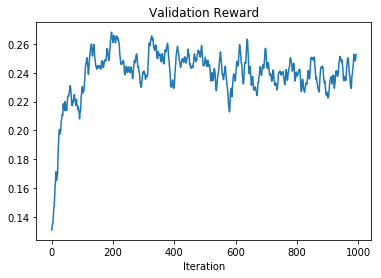

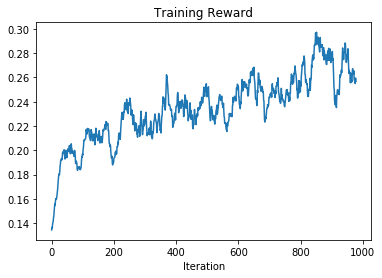

In [7]:
import matplotlib.pyplot as plt

smooth = 5
plt.title('Validation Reward')
plt.xlabel('Iteration')
plt.plot(np.convolve(val, [1 / smooth] * smooth)[smooth:-smooth])
plt.savefig('results/validation.png')
plt.show()

smooth = 20
plt.title('Training Reward')
plt.xlabel('Iteration')
plt.plot(np.convolve(tran, [1 / smooth] * smooth)[smooth:-smooth])
plt.savefig('results/training.png')
plt.show()

In [9]:
times = []

In [48]:
test_data = data[random.choice(testing)]

s, a, r = net.path([(dna_vec(a), b) for a, b in test_data])
top3 = sorted(test_data, key=lambda x: x[1])[-3:]
done = 0

print('top 3')
for x in top3:
    print(*x)

print()
print('best seen\t\t', 'rate\t\t', 'action\t\t\t', 'reward\t\t')
for i, (state, action, reward) in enumerate(zip(s, a, r)):
    best_seen = max(state, key=lambda x: x[1])
    if vec_dna(best_seen[0]) in [x[0] for x in top3] and not done:
        times.append(i)
        done = 1
    print(vec_dna(best_seen[0]), '\t', best_seen[1], '\t', vec_dna(action), '\t', reward)

top 3
TGAAAAGGCCCAGATCACCG 0.856509475
GCTTGGTACGCAGAGCACCG 0.861398837
GCACAATGAGAACTCCGACA 0.871919619

best seen		 rate		 action			 reward		
GAGAGAGCTGAAGCTCATGC 	 0.563015428 	 GCAGCCATAAAGAAACACAG 	 0.3867987299
GTACACAATCAAGGACACAG 	 0.703270418 	 GCAGCCGTAAGAAAACACAG 	 0.31117659595
GTACACAATCAAGGACACAG 	 0.703270418 	 GCAGCCATAGGGCAACACAG 	 0.18266724494999997
GTACACAATCAAGGACACAG 	 0.703270418 	 GCAGTCTTAAAGAAACACAG 	 0.299137532
GTACACAATCAAGGACACAG 	 0.703270418 	 GTAGCCTTAAGAAAAAACAG 	 0.19180531590000002
GTACACAATCAAGGACACAG 	 0.703270418 	 GCTGCCATAGAAAAAAACAG 	 0.4200151416
GTACACAATCAAGGACACAG 	 0.703270418 	 GCAGCACTAAGAAAACACAG 	 0.4034736515
GGAGGAGGCTGAACGCACGA 	 0.806947303 	 GCAGTCATAAAGAAACACAG 	 0.3578193605
GGAGGAGGCTGAACGCACGA 	 0.806947303 	 GCATTAATCGGACTACACGG 	 0.4306994185
GCTTGGTACGCAGAGCACCG 	 0.861398837 	 GCAGCATTAAAACAACACAG 	 0.3966251565
GCTTGGTACGCAGAGCACCG 	 0.861398837 	 GCAGCCATCAAAAAACACAG 	 0.365790608
GCTTGGTACGCAGAGCACCG 	 0.861398837 	 GCA

In [50]:
print(np.mean(np.array(times)))

8.0
